In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

In [13]:
#http://finance.yahoo.com/q?s=AAPL

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
list_of_tickers = ["SPY", "AGG"]

In [14]:
# YOUR CODE HERE
#end_date = datetime.now()
#start_date = end_date + timedelta(-365)
#closing_prices_df = get_historical_data(list_of_tickers, start_date, end_date, output_format = 'pandas')

In [6]:
closing_prices_df.to_pickle("historical_closing_prices.pickle")

NameError: name 'closing_prices_df' is not defined

In [45]:
historical_data_df = pd.read_pickle("historical_closing_prices.pickle")

In [46]:
historical_data_df.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2019-01-29  263.92  264.55  262.48  263.41   66136334  106.73  106.93  106.69   
2019-01-30  265.10  268.52  264.25  267.58   92473671  106.79  107.15  106.79   
2019-01-31  267.51  270.47  267.27  269.93  104012073  107.30  107.53  107.29   
2019-02-01  270.15  271.20  269.18  270.06   85782524  107.09  107.15  106.88   
2019-02-04  270.11  272.03  269.36  271.96   60744844  106.83  106.90  106.77   

                              
             close    volume  
date                          
2019-01-29  106.90   6158607  
2019-01-30  107.14   6350434  
2019-01-31  107.46  14766451  
2019-02-01  106.97   7227896  
2019-02-04  106.88  14227726

In [47]:
historical_data_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)

In [48]:
historical_data_df.head()

,SPY,AGG
,close,close
date,,
2019-01-29,263.41,106.90
2019-01-30,267.58,107.14
2019-01-31,269.93,107.46
2019-02-01,270.06,106.97
2019-02-04,271.96,106.88


In [49]:
# check to see if the index is in datetime format
historical_data_df.index

DatetimeIndex(['2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07',
               '2019-02-08', '2019-02-11',
               ...
               '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', name='date', length=252, freq=None)

In [50]:
# columns are in the correct format to do our calculations
historical_data_df.dtypes

SPY  close    float64
AGG  close    float64
dtype: object

In [51]:
historical_data_df.isnull().sum()

SPY  close    0
AGG  close    0
dtype: int64

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [13]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns = historical_data_df.pct_change().dropna()

In [52]:
daily_returns.head()

,SPY,AGG
,close,close
date,,
2019-01-30,0.015831,0.002245
2019-01-31,0.008782,0.002987
2019-02-01,0.000482,-0.004560
2019-02-04,0.007035,-0.000841
2019-02-05,0.004192,0.002152


In [54]:
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg = daily_returns.mean()['AGG']['close']

In [55]:
avg_daily_return_spy

0.0008885424610777967

In [56]:
avg_daily_return_agg

0.00025980151032518493

In [62]:
# Calculate volatility
# YOUR CODE HERE
volatility_return_spy = daily_returns.std()['SPY']['close']
volatility_return_agg = daily_returns.std()['AGG']['close']
volatility_return_spy

0.007480403701160129

In [63]:
historical_data_df.tail(1)

,SPY,AGG
,close,close
date,,
2020-01-28,326.89,114.04


In [72]:
# Save the last day's closing price
# YOUR CODE HERE
spy_last_closing_price = historical_data_df['SPY','close'][-1]
spy_last_closing_price

326.89

In [73]:
agg_last_closing_price = historical_data_df['AGG','close'][-1]
agg_last_closing_price

114.04

In [98]:
# Setup the Monte Carlo Parameters

number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

for x in range(number_simulations):
    # YOUR CODE HERE
    spy_simulated_price_list = [spy_last_closing_price]
    agg_simulated_price_list = [agg_last_closing_price]
    
    spy_randoms = np.random.normal(avg_daily_return_spy, volatility_return_spy, number_records)
    agg_randoms = np.random.normal(avg_daily_return_agg, volatility_return_agg, number_records)
    
    for i in range(number_records):
        # Calculate the simulated price using the last prices within the list
    
        spy_simulated_price_result = spy_simulated_price_list[-1] * (1+spy_randoms[i])
        agg_simulated_price_result = agg_simulated_price_list[-1] * (1+agg_randoms[i])
        
        spy_simulated_price_list.append(spy_simulated_price_result)
        agg_simulated_price_list.append(agg_simulated_price_result)
        
    monte_carlo["SPY Prices "] = pd.Series(spy_simulated_price_list)
    monte_carlo["AGG Prices"] = pd.Series(agg_simulated_price_list)
    
    simulated_daily_returns = monte_carlo.pct_change().dropna()
    
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns).cumprod()

In [99]:
portfolio_cumulative_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,0.996639,1.006064,1.000015,0.999718,1.005877,0.995669,0.997690,1.003201,1.004840,1.011542,...,1.001706,1.000324,0.998697,0.998513,1.006654,0.999350,0.995518,1.001128,0.987919,1.007484
2,0.997538,1.012583,0.998225,0.992645,1.008975,0.995713,1.003963,1.000124,1.004647,1.011608,...,1.000974,0.991439,0.998368,0.995697,1.008082,1.016173,0.987707,0.997836,0.985585,1.012883
3,0.994354,1.015413,1.001953,0.991613,1.006417,0.994706,0.999272,0.997150,1.004749,1.021809,...,1.002047,0.989905,0.997157,0.996873,1.007953,1.016925,0.982113,0.998267,0.990710,1.015288
4,0.993818,1.012248,0.997810,0.997334,1.002819,0.993683,1.006809,0.996827,1.003489,1.018942,...,1.004948,0.989589,1.000677,1.002635,1.016186,1.018288,0.988308,0.998957,0.983822,1.025629
5,0.985816,1.015656,0.995670,0.999808,1.003547,0.996221,1.010192,0.995495,1.006255,1.012441,...,1.003603,0.989275,1.002953,1.005304,1.017359,1.023415,0.986462,0.998863,0.986496,1.027639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,300.934776,141.747446,80.793591,105.103948,137.559215,70.328438,58.394252,197.782726,372.031151,203.815211,...,115.310520,52.002244,88.753763,135.388820,99.668903,60.168771,104.572778,139.231458,109.903003,87.946958
7557,298.689461,140.977873,80.956368,104.960735,137.181180,70.175428,58.691707,196.775958,372.646120,203.981193,...,115.719782,52.143816,88.782899,133.774531,99.898168,60.058599,104.018142,137.853513,110.368902,88.042926
7558,298.052800,140.266731,80.795353,104.895197,136.881215,70.435082,58.834738,197.116825,371.110147,204.138025,...,116.244705,52.730478,88.471618,133.581093,100.868510,60.496971,104.982220,137.557488,109.673024,88.225117
7559,295.637716,139.897637,81.508890,105.262361,136.685047,70.067384,59.490823,196.462532,372.377144,204.643971,...,116.727325,52.971195,88.601795,133.649984,101.171070,60.599825,104.853999,138.786321,110.019108,89.060734


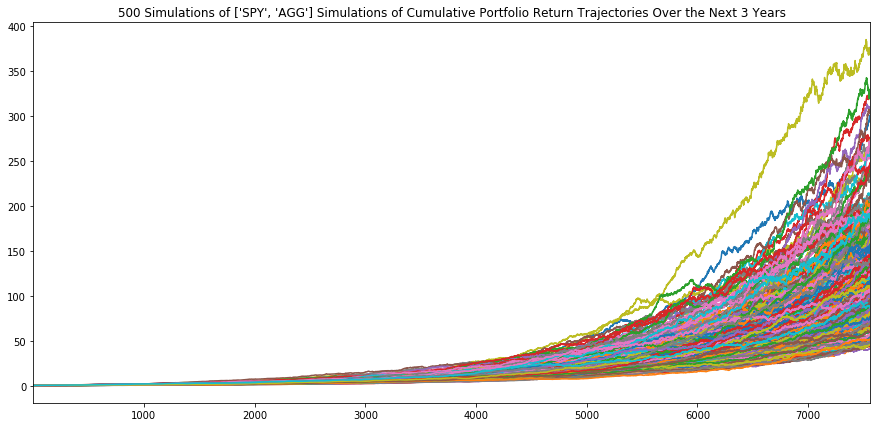

In [100]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{number_simulations} Simulations of {list_of_tickers} Simulations of Cumulative Portfolio Return Trajectories Over the Next 3 Years"
portfolio_cumulative_returns.plot(figsize=(15,7), legend = None, title = plot_title)

In [101]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    296.431668
1    139.079331
2     80.933135
3    105.563166
4    137.002660
Name: 7560, dtype: float64

In [105]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
portfolio_cumulative_returns.iloc[252*20,:]

0      56.767633
1      31.588976
2      18.285123
3      23.187766
4      24.198468
         ...    
495    15.840519
496    40.271465
497    23.940698
498    21.147093
499    25.601283
Name: 5041, Length: 500, dtype: float64

In [110]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = ending_cumulative_returns.quantile(q = [0.05, 0.95])
confidence_interval

0.05     55.331228
0.95    205.052264
Name: 7560, dtype: float64

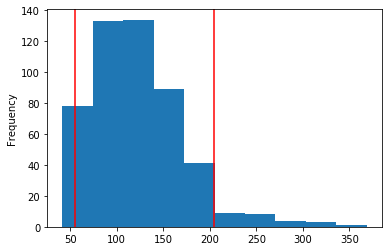

In [115]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure()
ending_cumulative_returns.plot.hist()
plt.axvline(confidence_interval.iloc[0], color = 'r')
plt.axvline(confidence_interval.iloc[1], color = 'r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [116]:
# YOUR CODE HERE
confidence_interval_a =ending_cumulative_returns.quantile(q = [0.05, 0.95])
confidence_interval_a

0.05     55.331228
0.95    205.052264
Name: 7560, dtype: float64

In [117]:
confidence_interval_b = ending_cumulative_returns.quantile(q = [0.25, 0.75])
confidence_interval_b

0.25     88.555836
0.75    148.982091
Name: 7560, dtype: float64

In [118]:
confidence_interval_c = ending_cumulative_returns.quantile(q = [0.10, 0.90])
confidence_interval_c 

0.1     65.717626
0.9    183.760265
Name: 7560, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [133]:
# YOUR CODE HERE
initial_investment = 20000

exp_port_return_upper_a = initial_investment * confidence_interval_a.iloc[1]
exp_port_return_lower_a = initial_investment * confidence_interval_a.iloc[0]

print(f"The 90th percentile expected return range is betwen ${round(exp_port_return_lower_a,2)}"
      f"and ${round(exp_port_return_upper_a,2)}")

exp_port_return_upper_b = initial_investment * confidence_interval_b.iloc[1]
exp_port_return_lower_b = initial_investment * confidence_interval_b.iloc[0]

print(f"The 50th percentile expected return range is betwen ${round(exp_port_return_lower_b,2)}"
      f"and ${round(exp_port_return_upper_b,2)}")

exp_port_return_upper_c = initial_investment * confidence_interval_c.iloc[1]
exp_port_return_lower_c = initial_investment * confidence_interval_c.iloc[0]
print(f"The 10th percentile expected return range is betwen ${round(exp_port_return_lower_c,2)}"
      f"and ${round(exp_port_return_upper_c,2)}")

The 90th percentile expected return range is betwen $1106624.57and $4101045.29
The 50th percentile expected return range is betwen $1771116.71and $2979641.83
The 10th percentile expected return range is betwen $1314352.52and $3675205.29


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [139]:
# YOUR CODE HERE
print(round(exp_port_return_lower_c * .04,2))
print(round(exp_port_return_upper_c *.04,2))

52574.1
147008.21


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE